# Análise Dataset GOT

## Análise Episódios 

Analisar os datasets referentes ao seriado Game Of Thrones, tanto referente aos livros quanto aos episódios.
Com isso em mãos, iremos tentar responder algumas perguntas, dentre as quais citamos:
- melhor temporada
- pior temporada
- melhor episódio
- pior episódio
- a melhor temporada tem o melhor episódio?
- a pior temporada tem o pior episódio?
- os episódios bons ficam na mesmas partes das temporadas? vide TWD, os episódios bons eram os season-finale, fall-finale e os primeiros de cada temporada
- os atacantes ganham mais batalhas?
- qual estratégia é mais vitoriosa? (emboscadas?)
- quem ganha mais batalhas?

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('dataset/GOTS01.json') as arq:    
    data = json.load(arq)

In [3]:
print(data)

{'Title': 'Game of Thrones', 'Season': '1', 'totalSeasons': '8', 'Episodes': [{'Title': 'Winter Is Coming', 'Released': '2011-04-17', 'Episode': '1', 'imdbRating': '9.0', 'imdbID': 'tt1480055'}, {'Title': 'The Kingsroad', 'Released': '2011-04-24', 'Episode': '2', 'imdbRating': '8.8', 'imdbID': 'tt1668746'}, {'Title': 'Lord Snow', 'Released': '2011-05-01', 'Episode': '3', 'imdbRating': '8.7', 'imdbID': 'tt1829962'}, {'Title': 'Cripples, Bastards, and Broken Things', 'Released': '2011-05-08', 'Episode': '4', 'imdbRating': '8.8', 'imdbID': 'tt1829963'}, {'Title': 'The Wolf and the Lion', 'Released': '2011-05-15', 'Episode': '5', 'imdbRating': '9.1', 'imdbID': 'tt1829964'}, {'Title': 'A Golden Crown', 'Released': '2011-05-22', 'Episode': '6', 'imdbRating': '9.2', 'imdbID': 'tt1837862'}, {'Title': 'You Win or You Die', 'Released': '2011-05-29', 'Episode': '7', 'imdbRating': '9.3', 'imdbID': 'tt1837863'}, {'Title': 'The Pointy End', 'Released': '2011-06-05', 'Episode': '8', 'imdbRating': '9.

In [4]:
GOT01 = pd.DataFrame(data['Episodes'])
print(GOT01)

                                   Title    Released Episode imdbRating  \
0                       Winter Is Coming  2011-04-17       1        9.0   
1                          The Kingsroad  2011-04-24       2        8.8   
2                              Lord Snow  2011-05-01       3        8.7   
3  Cripples, Bastards, and Broken Things  2011-05-08       4        8.8   
4                  The Wolf and the Lion  2011-05-15       5        9.1   
5                         A Golden Crown  2011-05-22       6        9.2   
6                     You Win or You Die  2011-05-29       7        9.3   
7                         The Pointy End  2011-06-05       8        9.0   
8                                 Baelor  2011-06-12       9        9.6   
9                         Fire and Blood  2011-06-19      10        9.5   

      imdbID  
0  tt1480055  
1  tt1668746  
2  tt1829962  
3  tt1829963  
4  tt1829964  
5  tt1837862  
6  tt1837863  
7  tt1837864  
8  tt1851398  
9  tt1851397  


In [5]:
GOT01.columns

Index(['Title', 'Released', 'Episode', 'imdbRating', 'imdbID'], dtype='object')

In [6]:
GOT01.dtypes

Title         object
Released      object
Episode       object
imdbRating    object
imdbID        object
dtype: object

In [7]:
GOT01[ 'imdbRating' ] = GOT01['imdbRating'].astype(float)

In [8]:
GOT01.dtypes

Title          object
Released       object
Episode        object
imdbRating    float64
imdbID         object
dtype: object

In [9]:
GOT01.imdbRating.mean()

9.099999999999998

In [10]:
GOT01 = GOT01.assign(season = "S01").copy(deep=True)

In [11]:
GOT01.drop(columns=['imdbID'])

,Title,Released,Episode,imdbRating,season
0,Winter Is Coming,2011-04-17,1,9.0,S01
1,The Kingsroad,2011-04-24,2,8.8,S01
2,Lord Snow,2011-05-01,3,8.7,S01
3,"Cripples, Bastards, and Broken Things",2011-05-08,4,8.8,S01
4,The Wolf and the Lion,2011-05-15,5,9.1,S01
5,A Golden Crown,2011-05-22,6,9.2,S01
6,You Win or You Die,2011-05-29,7,9.3,S01
7,The Pointy End,2011-06-05,8,9.0,S01
8,Baelor,2011-06-12,9,9.6,S01
9,Fire and Blood,2011-06-19,10,9.5,S01


In [12]:
with open('dataset/GOTS02.json') as arq:    
    data = json.load(arq)

In [13]:
GOT02 = pd.DataFrame(data['Episodes'])

In [14]:
GOT02[ 'imdbRating' ] = GOT02['imdbRating'].astype(float)
GOT02 = GOT02.assign(season = "S02").copy(deep=True)
GOT02.drop(columns=['imdbID'])

,Title,Released,Episode,imdbRating,season
0,The North Remembers,2012-04-01,1,8.8,S02
1,The Night Lands,2012-04-08,2,8.6,S02
2,What Is Dead May Never Die,2012-04-15,3,8.9,S02
3,Garden of Bones,2012-04-22,4,8.8,S02
4,The Ghost of Harrenhal,2012-04-29,5,8.9,S02
5,The Old Gods and the New,2012-05-06,6,9.1,S02
6,A Man Without Honor,2012-05-13,7,8.9,S02
7,The Prince of Winterfell,2012-05-20,8,8.8,S02
8,Blackwater,2012-05-27,9,9.7,S02
9,Valar Morghulis,2012-06-03,10,9.4,S02


In [15]:
GOT =  GOT01.append(GOT02, ignore_index = True)

In [16]:
GOT

,Title,Released,Episode,imdbRating,imdbID,season
0,Winter Is Coming,2011-04-17,1,9.0,tt1480055,S01
1,The Kingsroad,2011-04-24,2,8.8,tt1668746,S01
2,Lord Snow,2011-05-01,3,8.7,tt1829962,S01
3,"Cripples, Bastards, and Broken Things",2011-05-08,4,8.8,tt1829963,S01
4,The Wolf and the Lion,2011-05-15,5,9.1,tt1829964,S01
5,A Golden Crown,2011-05-22,6,9.2,tt1837862,S01
6,You Win or You Die,2011-05-29,7,9.3,tt1837863,S01
7,The Pointy End,2011-06-05,8,9.0,tt1837864,S01
8,Baelor,2011-06-12,9,9.6,tt1851398,S01
9,Fire and Blood,2011-06-19,10,9.5,tt1851397,S01


In [17]:
for i in range(3,8):
    with open("dataset/GOTS0" + str(i) + ".json") as arq:
        data = json.load(arq)
        temporada = pd.DataFrame(data['Episodes'])
        temporada[ 'imdbRating' ] = temporada['imdbRating'].astype(float)
        temporada = temporada.assign(season = "S0"+ str(i)).copy(deep=True)
        temporada.drop(columns=['imdbID'])
        GOT =  GOT.append(temporada, ignore_index = True)

In [18]:
GOT

,Title,Released,Episode,imdbRating,imdbID,season
0,Winter Is Coming,2011-04-17,1,9.0,tt1480055,S01
1,The Kingsroad,2011-04-24,2,8.8,tt1668746,S01
2,Lord Snow,2011-05-01,3,8.7,tt1829962,S01
3,"Cripples, Bastards, and Broken Things",2011-05-08,4,8.8,tt1829963,S01
4,The Wolf and the Lion,2011-05-15,5,9.1,tt1829964,S01
...,...,...,...,...,...,...
62,The Queen's Justice,2017-07-30,3,9.3,tt5775840,S07
63,The Spoils of War,2017-08-06,4,9.8,tt5775846,S07
64,Eastwatch,2017-08-13,5,9.0,tt5775854,S07
65,Beyond the Wall,2017-08-20,6,9.2,tt5775864,S07


In [19]:
GOT.count()

Title         67
Released      67
Episode       67
imdbRating    67
imdbID        67
season        67
dtype: int64

In [20]:
colunas_selecionadas = ["Title","imdbRating","season", "Episode"]
GOT[colunas_selecionadas].head()

,Title,imdbRating,season,Episode
0,Winter Is Coming,9.0,S01,1
1,The Kingsroad,8.8,S01,2
2,Lord Snow,8.7,S01,3
3,"Cripples, Bastards, and Broken Things",8.8,S01,4
4,The Wolf and the Lion,9.1,S01,5


### Melhor temporada

In [21]:
media = GOT.groupby('season')['imdbRating'].mean().sort_values(ascending = False)
media

season
S04    9.330000
S07    9.228571
S06    9.100000
S01    9.100000
S03    9.050000
S02    8.990000
S05    8.880000
Name: imdbRating, dtype: float64

### Melhor episódio

In [22]:
GOT[GOT["imdbRating"] == GOT.imdbRating.max()]

,Title,Released,Episode,imdbRating,imdbID,season
28,The Rains of Castamere,2013-06-02,9,9.9,tt2178784,S03
47,Hardhome,2015-05-31,8,9.9,tt3866850,S05
58,Battle of the Bastards,2016-06-19,9,9.9,tt4283088,S06
59,The Winds of Winter,2016-06-26,10,9.9,tt4283094,S06


### Pior Episódio 

In [23]:
GOT[GOT["imdbRating"] == GOT.imdbRating.min()]

,Title,Released,Episode,imdbRating,imdbID,season
45,"Unbowed, Unbent, Unbroken",2015-05-17,6,8.1,tt3866842,S05


### Cronologia da qualidade dos episódios 

In [24]:
GOT.loc[66]["Title"]

'The Dragon and the Wolf'

In [25]:
rows = ["season", "Episode", "imdbRating"]
GOT[rows]

,season,Episode,imdbRating
0,S01,1,9.0
1,S01,2,8.8
2,S01,3,8.7
3,S01,4,8.8
4,S01,5,9.1
...,...,...,...
62,S07,3,9.3
63,S07,4,9.8
64,S07,5,9.0
65,S07,6,9.2


In [26]:
GOT.groupby("season")["Title"].count()

season
S01    10
S02    10
S03    10
S04    10
S05    10
S06    10
S07     7
Name: Title, dtype: int64

In [27]:
GOT[10:21]

,Title,Released,Episode,imdbRating,imdbID,season
10,The North Remembers,2012-04-01,1,8.8,tt1971833,S02
11,The Night Lands,2012-04-08,2,8.6,tt2069318,S02
12,What Is Dead May Never Die,2012-04-15,3,8.9,tt2070135,S02
13,Garden of Bones,2012-04-22,4,8.8,tt2069319,S02
14,The Ghost of Harrenhal,2012-04-29,5,8.9,tt2074658,S02
15,The Old Gods and the New,2012-05-06,6,9.1,tt2085238,S02
16,A Man Without Honor,2012-05-13,7,8.9,tt2085239,S02
17,The Prince of Winterfell,2012-05-20,8,8.8,tt2085240,S02
18,Blackwater,2012-05-27,9,9.7,tt2084342,S02
19,Valar Morghulis,2012-06-03,10,9.4,tt2112510,S02


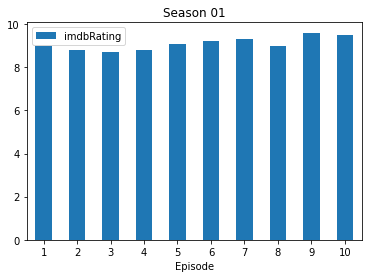

In [28]:
ax = GOT[0:10].plot.bar(x='Episode', y='imdbRating', title="Season 01", rot=0)

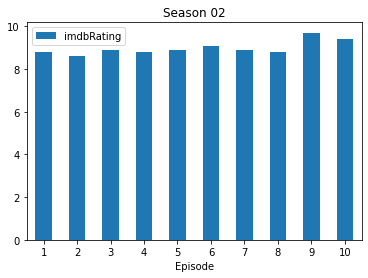

In [29]:
ax = GOT[10:20].plot.bar(x='Episode', y='imdbRating', title = "Season 02", rot=0)

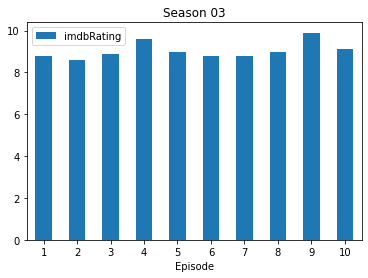

In [30]:
ax = GOT[20:30].plot.bar(x='Episode', y='imdbRating', title = "Season 03", rot=0)

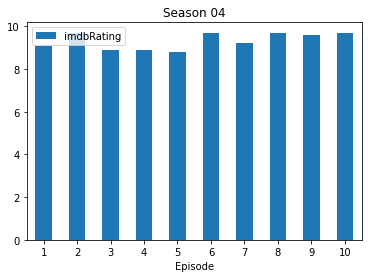

In [31]:
ax = GOT[30:40].plot.bar(x='Episode', y='imdbRating', title = "Season 04", rot=0)

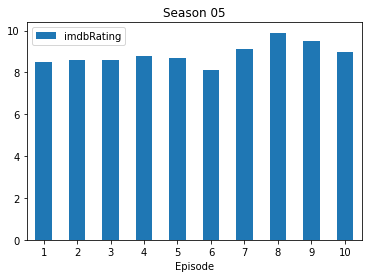

In [32]:
ax = GOT[40:50].plot.bar(x='Episode', y='imdbRating', title = "Season 05", rot=0)

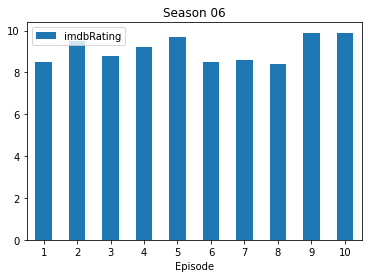

In [33]:
ax = GOT[50:60].plot.bar(x='Episode', y='imdbRating', title = "Season 06", rot=0)

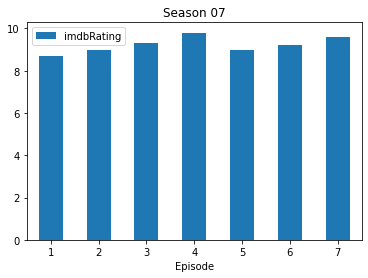

In [34]:
ax = GOT[60:].plot.bar(x='Episode', y='imdbRating', title = "Season 07", rot=0)

## Análise Mortes 

In [35]:
mortes = pd.read_csv("dataset/GOT-character-deathsBOOK.csv")
mortes.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [36]:
mortes.count()

Name                  917
Allegiances           917
Death Year            305
Book of Death         307
Death Chapter         299
Book Intro Chapter    905
Gender                917
Nobility              917
GoT                   917
CoK                   917
SoS                   917
FfC                   917
DwD                   917
dtype: int64

### Mortes por Aliança 

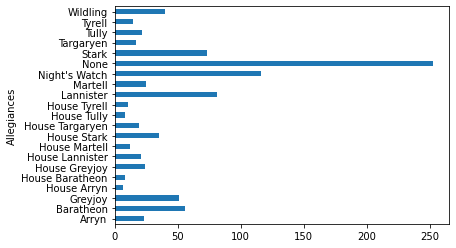

In [37]:
aliancas = mortes.groupby("Allegiances")["Name"].count()
ax = aliancas.plot.barh()

### Mortes por Gênero 

In [38]:
mortes[ 'Gender' ] = mortes['Gender'].astype(object)

In [39]:
mortes.dtypes

Name                   object
Allegiances            object
Death Year            float64
Book of Death         float64
Death Chapter         float64
Book Intro Chapter    float64
Gender                 object
Nobility                int64
GoT                     int64
CoK                     int64
SoS                     int64
FfC                     int64
DwD                     int64
dtype: object

In [40]:
mortes = mortes.replace({"Gender":{0:"F", 1:"M"}})
genero = mortes.groupby("Gender")["Name"].count()
genero

Gender
F    157
M    760
Name: Name, dtype: int64

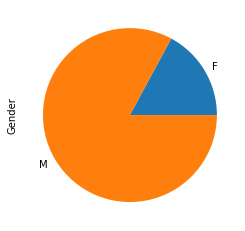

In [41]:
ax = genero.plot.pie(ylabel="Gender")

### Mortes por Livro 

In [42]:
book = mortes.groupby("Book of Death")["Name"].count()
book

Book of Death
1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Name, dtype: int64

<AxesSubplot:ylabel='Books'>

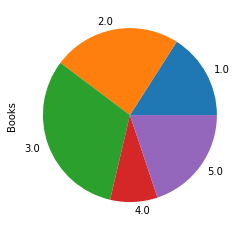

In [43]:
book.plot.pie(ylabel="Books")

<AxesSubplot:xlabel='Book of Death'>

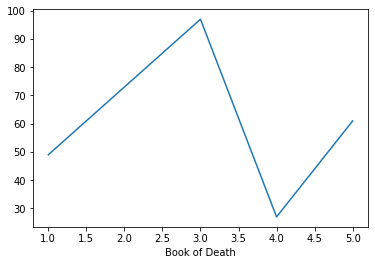

In [44]:
book.plot.line()

### Mortes por Capítulo 

In [45]:
chapter = mortes.groupby("Death Chapter")["Name"].count()
chapter.sort_values(ascending=False)

Death Chapter
34.0    16
51.0    14
20.0    13
66.0    12
55.0    11
        ..
48.0     1
9.0      1
17.0     1
16.0     1
80.0     1
Name: Name, Length: 71, dtype: int64

### Mortes por Ano 

In [46]:
ano = mortes.groupby("Death Year")["Allegiances"].count()
ano

Death Year
297.0      3
298.0     46
299.0    156
300.0    100
Name: Allegiances, dtype: int64

<AxesSubplot:xlabel='Death Year'>

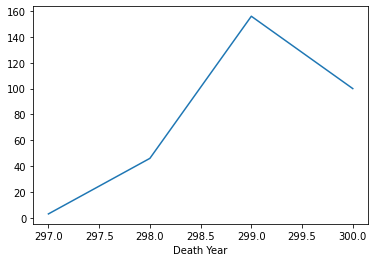

In [47]:
ano.plot.line()

In [48]:
mortes.head(5)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,M,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,M,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,M,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,M,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,M,1,0,0,1,0,0


In [49]:
nob = mortes.groupby("Nobility")["Name"].count()
nob

Nobility
0    487
1    430
Name: Name, dtype: int64

<AxesSubplot:ylabel='Nobility'>

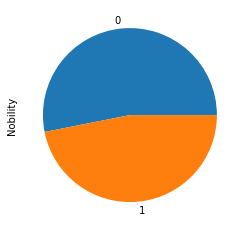

In [50]:
nob.plot.pie(ylabel = "Nobility")

## Análise Batalhas 

In [51]:
bat = pd.read_csv("dataset/battles.csv")

In [52]:
bat.head(10)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [64]:
infos = ['name','year', 'attacker_king', 'defender_king', 'attacker_outcome', 'battle_type', 'summer', 'region']
bat.count()

name                  38
year                  38
battle_number         38
attacker_king         36
defender_king         35
attacker_1            38
attacker_2            10
attacker_3             3
attacker_4             2
defender_1            37
defender_2             2
defender_3             0
defender_4             0
attacker_outcome      37
battle_type           37
major_death           37
major_capture         37
attacker_size         24
defender_size         19
attacker_commander    37
defender_commander    28
summer                37
location              37
region                38
note                   5
dtype: int64

### Batalhas por Ano 

In [54]:
ano = bat.groupby("year")["name"].count()
ano

year
298     7
299    20
300    11
Name: name, dtype: int64

<AxesSubplot:ylabel='batalhas'>

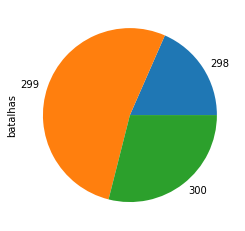

In [55]:
ano.plot.pie(ylabel = "batalhas")

* mais da metade das batalhas ocorreu no ano de 299

### Resultado das Batalhas 

In [56]:
wins = bat.groupby(["attacker_king","attacker_outcome" ])["year"].count()

In [57]:
wins

attacker_king             attacker_outcome
Balon/Euron Greyjoy       win                  7
Joffrey/Tommen Baratheon  loss                 1
                          win                 13
Robb Stark                loss                 2
                          win                  8
Stannis Baratheon         loss                 2
                          win                  2
Name: year, dtype: int64

- observamos que Joffrey/Tommen são os reis que mais lutam e que mais vencem

In [58]:
vitorias = bat.groupby("attacker_outcome")["year"].count()
vitorias

attacker_outcome
loss     5
win     32
Name: year, dtype: int64

- Observamos que na grande maioria das vezes os atacantes saem vitoriosos

In [59]:
wins = bat.groupby(["battle_type", "attacker_outcome"])["year"].count()

In [60]:
wins

battle_type     attacker_outcome
ambush          win                 10
pitched battle  loss                 4
                win                 10
razing          win                  2
siege           loss                 1
                win                 10
Name: year, dtype: int64

<AxesSubplot:xlabel='battle_type,attacker_outcome'>

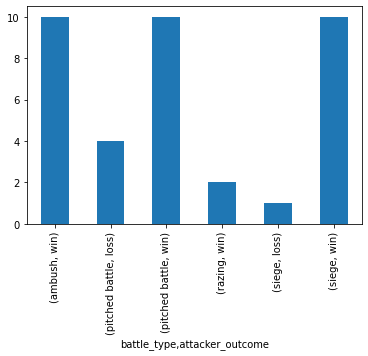

In [61]:
wins.plot.bar()

* Ao observar os dados, o modo mais aconselhável de batalhar é por meio de emboscadas, uma vez que nenhuma vez o atacante saiu perdedor
* o método de "razing" também nunca foi derrotado, porém só ocorreram 2 vezes, logo o caso pende mais para a emboscada
* o método de cerco tbm é uma boa estratégia, tendo em vista que acumula um ratio de 10:1

In [70]:
regiao = bat.groupby('region')['name'].count()
regiao

region
Beyond the Wall     1
The Crownlands      2
The North          10
The Reach           2
The Riverlands     17
The Stormlands      3
The Westerlands     3
Name: name, dtype: int64

In [73]:
bat.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

In [74]:
estacao = bat
estacao['summer'] = estacao['summer'].astype('object')

In [76]:
estacao.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                 object
location               object
region                 object
note                   object
dtype: object

In [83]:
estacao = estacao.replace({"summer":{0:"Não", 1:"Sim"}})

In [84]:
verao = estacao.groupby('summer')['name'].count()
verao

summer
Não    11
Sim    26
Name: name, dtype: int64

<AxesSubplot:ylabel='IsVerao'>

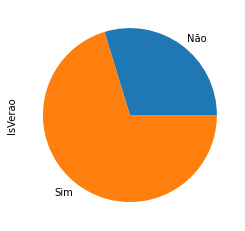

In [86]:
verao.plot.pie(ylabel = "IsVerao")

In [87]:
bat

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...
